{[Click here to read this notebook in Google Colab](https://colab.research.google.com/drive/1xKqQhGzuIkaNxBpMS2v7hWSfg-soOWR4)}

<head><link rel = "stylesheet" href = "https://drive.google.com/uc?id=1zYOH-_Mb9jOjRbQmghdhsmZ2g6xAwakk"></head>

<table class = "header"><tr>
    <th align = "left">EPAT Batch 45 | EFS 6, 2020\06\04</th>
    <th align = "right">Written by: Gaston Solari Loudet</th>
</tr></table>

### Exchange-Traded Funds

In [1]:
%%capture
!pip install yfinance
import sys, numpy, pandas, matplotlib.pyplot, statsmodels.api, yfinance, IPython
# Default plot properties: dark colors.
mplstyle = "https://drive.google.com/uc?id=1TawPXELPzNlySaOx3HT67A-wHwRxuWjQ"
matplotlib.pyplot.style.use(mplstyle)
# Download assignment files.
def read_csv(ID):
    URL = "https://drive.google.com/uc?id=" + ID
    Data = pandas.read_csv(URL, index_col = "Date", parse_dates = True)
    return Data.iloc[:, 0]

#### Question 1

The <u>tracking error</u> is a key component in evaluating the performance of an exchange traded fund. A lower tracking error is one of the key selling points for any ETF. An estimate of daily tracking error ("$TE$") can be based on the following formula:

$$ TE = \sqrt{ \frac {\Sigma_{t = 1}^{T} (R_{ETF}(t) - R_{BMK}(t))^{2}} {T - 1} } $$

Here, "$R_{BMK}(t)$" and "$R_{ETF}(t)$" denote the daily return of the benchmark and the exchange-traded fund respectively, at time "$t$". "$N$" denotes the total number of trading periods considered. In this case, days, so "$T = 252$" to obtain an estimate of annualized tracking error.

For this question, "``NIFTY-TotalReturnsIndex.csv``" for 2016-2017 period has been provided, alongside historical NAV data in CSV files during the same time span for the following NIFTY ETFs: "``Reliance``", "``Kotak``", "``HDFC``" and "``UTI``". Compute the annualized tracking error for each one in 2016 and 2017 separately.

In [2]:
# Nifty ETFs between which we will compare.
Data_Q1 = pandas.DataFrame(columns = ["Benchmark"])
Base_Q1 = pandas.DataFrame(index = ["ID"], data = \
  {"Benchmark": ["1aplQ6hGByh7Lv4OvinV9f5RTqrq7moct"],
"Reliance NAV": ["1KZ5mQshBT1I45wR8J7LkNv5acIkS2-AM"],
   "Kotak NAV": ["1G83iiS3sXr8jk4KXSncckgn45nIV-D0U"],
    "HDFC NAV": ["1Hq08ina3lMoTq-_0QklPEbqlon9ylzbF"],
     "UTI NAV": ["1bnoEuMD32xxRZX5PsMgmzz56fLBBR6Ep"]}).transpose()
# Add ETF data to dataframe
for ETF, ID in Base_Q1["ID"].items(): Data_Q1[ETF] = read_csv(ID)
# Solve NaN values with forward fill method.
Data_Q1.fillna(method = "ffill", inplace = True)
# Calculate returns.
Data_Q1 = Data_Q1.pct_change().fillna(method = "bfill")
print("Dataframe peek:\n‾‾‾‾‾‾‾‾‾‾‾‾‾‾")
IPython.display.display(Data_Q1)

Dataframe peek:
‾‾‾‾‾‾‾‾‾‾‾‾‾‾


,Benchmark,Reliance NAV,Kotak NAV,HDFC NAV,UTI NAV
Date,,,,,
2016-01-01,-0.021585,-0.018322,-0.015029,-0.009551,-0.010616
2016-01-04,-0.021585,-0.018322,-0.015029,-0.009551,-0.010616
2016-01-05,-0.000851,-0.000633,-0.005549,-0.007727,-0.001107
2016-01-06,-0.005608,-0.005887,-0.002283,0.008302,-0.006945
2016-01-07,-0.022312,-0.020684,-0.017794,-0.028263,-0.020146
...,...,...,...,...,...
2017-12-22,0.005050,0.004532,0.001985,0.002774,0.000102
2017-12-26,0.003667,0.003196,0.002359,-0.000617,0.006527
2017-12-27,-0.003867,-0.000406,-0.001130,0.006144,-0.000202


Downloaded CSV files contain prices, but tracking error must be calculated over returns. Therefore, "``Data_Q1``" must be replaced by its percentage changes, as done on the last line above.

In [3]:
# Tracking errors:
TE = pandas.DataFrame(columns = Data_Q1.columns)
diffs = Data_Q1.sub(other = Data_Q1["Benchmark"], axis = "index")
# For each year in dataframe...
for year in set(Data_Q1.index.year):
    diff = diffs[Data_Q1.index.year == year]
    count = diff.count() # Amount of "N" rows belonging to that year.
                         #       √{ Σ (R - RB)² / (N - 1) }
    TE.loc[year, TE.columns] = ((diff**2).sum()/(count - 1))**(1/2)
TE.drop(columns = "Benchmark", inplace = True)
print("Tracking errors:\n" + 15*"‾")
# Display as percentage.
pandas.options.display.float_format = '{:.2f}%'.format
(TE*100).iloc[:]

Tracking errors:
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


,Reliance NAV,Kotak NAV,HDFC NAV,UTI NAV
2016,0.22%,0.33%,0.73%,0.67%
2017,0.14%,0.24%,0.37%,0.52%


#### Question 2

This question deals with the computation of returns and sharpe ratio for a simple asset allocation strategy. The following are the details of the strategy:
* Initial capital: "$B_{0} =$ ₹ 100 M".
* Portfolio allocation date: "$t_{0} =$ 2016-Jan-01".</li>
* Portfolio redemption date: "$t_{f} =$ 2017-Dec-30".</li>
* Capital invested among Nifty (N), Junior (J) and Gold (G) BeES.
* Allocated fractions: "$w_{N} = 0.5$", "$w_{J} = 0.2$" and "$w_{G} = 0.3$".
* The portfolio is rebalanced <u>only at the end of every quarter</u>.
* Weights are then brought back to the initial allocation, i.e: "$5:2:3$".

Note that the rebalancing should be done on the last day of each
quarter and hence the close prices on the last working day of each quarter should be used for rebalancing portfolio.

Compute the <u>Sharpe ratio</u> of your asset allocation strategy for 2016 and 2017. Assume zero transaction costs for quarterly rebalancing. Assume you can rebalance based on end of the day NAV. The Historical NAV ﬁles for the 3 BeES are provided with the assignment.

In [4]:
# Nifty ETFs between which we will compare.
pandas.options.display.float_format = '{:.0f}%'.format
Base_Q2 = pandas.DataFrame(index = ["ID", "Weight"], data = \
{"Junior": ["1o3DX7pKiRyvMNCRgigESiQzcj5hcZVBC", 0.2],
  "Nifty": ["1GjeF44mfayd92aEQzy5QvUI6yS-gO5-p", 0.5],
   "Gold": ["1_gfGKlWsBgFDLOWKmV9nLhVWwaN7CB2Y", 0.3]}).transpose()
print(f"Portfolio allocation:\n‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾\n{Base_Q2['Weight']*100}")
# Reformat numbers as floats.
pandas.options.display.float_format = '{:.4f}'.format
# Generate base dataframe with index file.
Data_Q2 = pandas.DataFrame(columns = Base_Q2.index)
# Add ETF data to dataframe
for ETF, ID in Base_Q2["ID"].items(): Data_Q2[ETF] = read_csv(ID)
# Solve NaN values with forward fill method.
Data_Q2.fillna(method = "ffill", inplace = True)
# Calculate returns.
Data_Q2 = Data_Q2.pct_change().fillna(method = "bfill")
print("\nDataframe peek:\n‾‾‾‾‾‾‾‾‾‾‾‾‾‾")
IPython.display.display(Data_Q2.iloc[numpy.r_[0:3, -3:0]])

Portfolio allocation:
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
Junior   20%
Nifty    50%
Gold     30%
Name: Weight, dtype: object

Dataframe peek:
‾‾‾‾‾‾‾‾‾‾‾‾‾‾


,Junior,Nifty,Gold
Date,,,
2016-01-01,-0.0149,-0.0183,0.0107
2016-01-04,-0.0149,-0.0183,0.0107
2016-01-05,0.0037,-0.0006,0.0065
2017-12-27,-0.0046,-0.0004,0.0062
2017-12-28,-0.0024,-0.0023,0.0079
2017-12-29,0.0060,0.0043,-0.0040


<body>

Consider the initial investments' values vector as "$\bar{B}(t_{0}) = B_{0}\bar{w}$". In this case, "$\bar{w} = (w_{N};\;w_{J};\;w_{G})$". So our amount of shares "$\bar{Q}$" bought for each instrument, is the allocated investment for them, divided element-wise by the corresponding prices at start time: "$ \bar{Q} = \bar{B}/\bar{P}(t_{0}) $".

When rebalancing date/time comes, the value of our investment is the amount of shares for each ETF, multiplied elementwise ("$\cdot$") by the most recent prices: "$ \bar{B}(t_{f}) = \bar{Q} \cdot \bar{P}(t_{f}) $". Joining all the equations of the previous paragraphs up to now:

$$ \bar{B}(t_{f}) = B_{0} \bar{w} \cdot \frac{\bar{P}(t_{f})}{\bar{P}(t_{0})} $$

The net growth of our capital is thus the sum of all our final values "$ B_{f} = \Sigma_{n = 1}^{3} \; B_{n}(t_{f})$" divided by the starting investment.<br>Note that the quotient of prices is the vector of returns "$\bar{R}$", and "$\bullet$" depicts the dot product:

$$ \frac{B_{f}}{B_{0}} =  \; \bar{w} \bullet \bar{R} $$

For the calculation of the Sharpe ratio in our portfolio during a defined period of time (i.e.: a quarter/3 months), we need to find the mean return vector "$\bar{R}_{m}$" and the covariance matrix "$𝕍$" for the combination of the allocated ETFs. The mean return "$R_{m}(\bar{w})$", variance "$\sigma(\bar{w})^{2}$" and Sharpe ratios "$\bar{S}(\bar{w})$" for our portfolio with respect to mean returns "$\bar{R}_{m}$" as benchmark references, can be worked out as:

$$ R_{m}(\bar{w}) = \bar{R}_{m} \bullet \bar{w} \qquad\qquad
\sigma(\bar{w})^{2} = \bar{w} \bullet 𝕍 \bullet \bar{w}^{T} \qquad\qquad 
\bar{S}(\bar{w}) = \frac{R_{m}(\bar{w}) - \bar{R}_{m}}{\sigma(\bar{w})} $$

So at first sight, the strategy seems to involve:
<ul> <li>Finding the returns for each quarter in all instruments, "$\bar{R}$".
</li><li>Mean quarterly return vector "$\bar{R}_{m}$" and covariance matrix "$𝕍$" for each year.
</li><li>Yearly Sharpes...
<ul> <li>...with references as no investment ("$\bar{R}_{m} = 0$"),
</li><li>...and with each of the 3 ETFs (our original "$\bar{R}_{m}$").
</li></ul></ul>

Sources:
<ul> <li>"<a href = "https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/">Calculating the covariance matrix and portfolio variance</a>" by V. Divakar
</li><li>"<a href = "https://core.ac.uk/download/pdf/41993265.pdf">Sharpe ratio of estimated efficient portfolios</a>" by A. Kourtis (page 3)</li></ul></body>

In [5]:
# Dataframe for storing statistics.
Stats = pandas.DataFrame(dtype = float)
for year in set(Data_Q2.index.year):
    rets_y = Data_Q2[Data_Q2.index.year == year].to_period(freq = "Q")
    rets_q = pandas.DataFrame(columns = rets_y.columns, dtype = float)
    for quarter in set(rets_y.index.quarter):
        # Log returns at the end of each year's quarter.
        X = 1 + rets_y[rets_y.index.quarter == quarter]
        log_X = X.apply(lambda x: numpy.log(x), axis = "index")
        rets_q.loc[quarter, rets_y.columns] = log_X.sum()
    # Calculate year's mean return vector and covariance matrix.
    Mean, Mcov = rets_q.mean(), numpy.matrix(rets_q.cov())
    # ETFs dataframe has the shape of the allocation vector "w".
    Stats.loc[year, "Mean returns"] = float(Base_Q2["Weight"].dot(Mean))
    std_dev = numpy.dot(Base_Q2["Weight"].dot(Mcov), Base_Q2["Weight"].transpose())**(1/2)
    Stats.loc[year, "S. deviation"] = float(std_dev)
    Stats.loc[year, "No invest"] = float(Base_Q2["Weight"].dot(Mean))/float(std_dev)
    for b, Bmk in enumerate(Mean.index): # Based on benchmark reference
        Stats.loc[year, Bmk] = float(Base_Q2["Weight"].dot(Mean) - Mean[Bmk])/(Mcov[b, b]**(1/2))

# Display as percentage.
print("Yearly Sharpe ratios:" + 15*" " + "...based on benchmark reference:")
print("‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾ " + 12*" " + "|" + 36*"‾" + "|")
pandas.options.display.float_format = '{:.2f}%'.format
IPython.display.display(Stats*100)

Yearly Sharpe ratios:               ...based on benchmark reference:
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾             |‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|


,Mean returns,S. deviation,No invest,Junior,Nifty,Gold
2016,1.41%,6.17%,22.82%,2.79%,17.08%,-18.50%
2017,5.32%,3.06%,173.71%,-74.71%,-32.11%,193.86%


#### Question 3

The following are the details of the strategy:
* Initial capital: "$B_{0} =$ ₹ 100 M".
* Portfolio allocation date: "$t_{0} =$ 2016-Jan-01".
* Portfolio redemption date: "$t_{f} =$ 2017-Dec-30".
* Capital equally allocated among 10 selected stocks from the NSE.
* No rebalancing between allocation and redemption date.

Compute the daily portfolio returns "$R(t)$" from start till redemption date. The historical NAV files for Nifty BeES and Junior BeES are provided with the assignment. Do a <u>**linear regression**</u> of your portfolio returns on Nifty ("$N$") and Junior ("$J$") ETF daily returns:

$$ R(t) = \beta_{0} + \beta_{N} R_{N}(t) + \beta_{J} R_{J}(t) + \epsilon(t) $$

In [6]:
# Selection of 10 NSE stocks.
stocks = ["TATAMOTORS", "BHARTIARTL", "HINDPETRO", "BLUEDART", "TECHM",
          "JETAIRWAYS", "DEEPAKFERT", "HDFCBANK", "AXISBANK", "MARUTI"]
start, end = Data_Q2.index[[0, -1]] # Same dates as previous exercises.
Data_Q3 = yfinance.download(tickers = [stk + ".NS" for stk in stocks],
                             start = start, end = end, periods = "1d")
# Find returns for each.
Data_Q3 = Data_Q3["Close"].pct_change().fillna(method = "bfill")
Data_Q3.columns = [stk[:-3] for stk in Data_Q3.columns]
# Allocation dataframe with portfolio weights for ETFs.
pandas.options.display.float_format = '{:.0f}%'.format
Base_Q3 = pandas.DataFrame(data = dict(zip(stocks, [0.1]*10)), index = ["Weight"])
print("Portfolio allocation:\n‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾\n", (100*Base_Q3).transpose())
# Get back to non-percentage float formatting in dataframes.
pandas.options.display.float_format = '{:.4f}'.format
# Add portfolio column by summing weighted returns' dataframe.
Data_Q3["Portfolio"] = numpy.dot(Data_Q3, Base_Q3.transpose())
# Add ETF data to dataframe
for ETF, ID in Base_Q2["ID"].items(): Data_Q3[ETF] = read_csv(ID).pct_change()
Data_Q3.dropna(axis = "index", inplace = True)
print("\nDataframe peek: (portfolio returns)\n‾‾‾‾‾‾‾‾‾‾‾‾‾‾")
IPython.display.display(Data_Q3.loc[:, ["Portfolio"] + list(Base_Q2.index)])

[*********************100%***********************]  10 of 10 completed
Portfolio allocation:
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
             Weight
TATAMOTORS     10%
BHARTIARTL     10%
HINDPETRO      10%
BLUEDART       10%
TECHM          10%
JETAIRWAYS     10%
DEEPAKFERT     10%
HDFCBANK       10%
AXISBANK       10%
MARUTI         10%

Dataframe peek: (portfolio returns)
‾‾‾‾‾‾‾‾‾‾‾‾‾‾


,Portfolio,Junior,Nifty,Gold
Date,,,,
2016-01-04,-0.0224,-0.0149,-0.0183,0.0107
2016-01-05,-0.0016,0.0037,-0.0006,0.0065
2016-01-06,0.0012,-0.0067,-0.0059,0.0058
2016-01-07,-0.0253,-0.0210,-0.0207,0.0144
2016-01-08,0.0093,0.0104,0.0022,-0.0026
...,...,...,...,...
2017-12-21,-0.0023,0.0056,-0.0006,0.0006
2017-12-22,0.0082,0.0050,0.0045,0.0016
2017-12-26,0.0113,0.0047,0.0032,0.0081


So the linear regression model may be found by finding the coefficients with the ordinary least-squares to fit a plane equation towards the retrieved returns' data. Function "``OLS``" from "``statsmodels``" package will be used for this due to its versatility in result presentation and retrieval.

In [7]:
# Create ordinary least-squares' predictor.
model = statsmodels.api.OLS(endog = Data_Q3["Portfolio"],
        exog = Data_Q3.loc[:, ["Nifty", "Junior"]]).fit()
print(model.summary(), "\n")
# Print coefficients on the same line.
sys.stdout.write("Linear regression coefficients:")
for beta in model.params.keys():
    sys.stdout.write("    \u03B2[%s] = %0.4f" \
                  % (beta, model.params[beta]))
    sys.stdout.flush()
print("\n" + 30*"‾")
# Coefficient of indetermination.
print("Portion of portfolio not foreseen from chosen ETF NAVs:", \
      "'1 - R\u00B2 = %.2f%%'" % (100*(1 - model.rsquared_adj)))
print(54*"‾")

OLS Regression Results                                
Dep. Variable:              Portfolio   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.713
Method:                 Least Squares   F-statistic:                              610.8
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                   8.14e-134
Time:                        23:17:20   Log-Likelihood:                          1856.9
No. Observations:                 492   AIC:                                     -3710.
Df Residuals:                     490   BIC:                                     -3701.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Additional regression graphing just for the sake of practice...

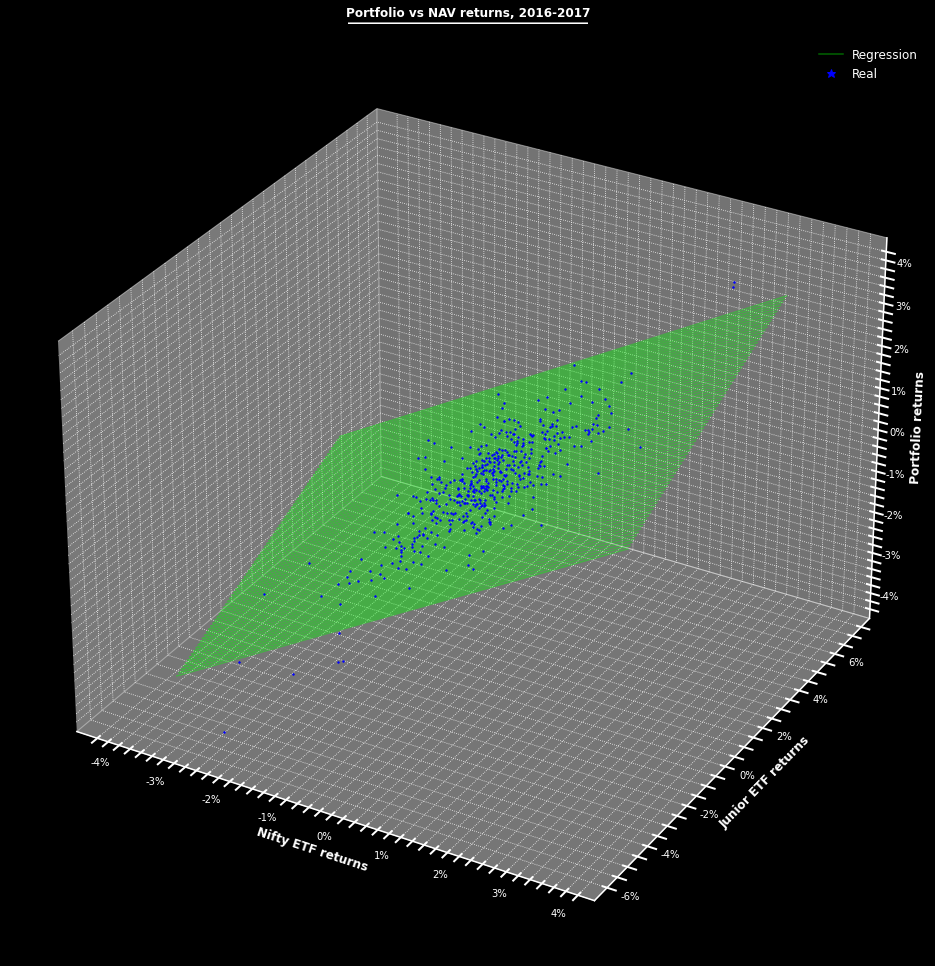

In [23]:
# Portfolio returns "Y" vs NAV returns "X1" & "X2".
X = numpy.arange(-4, 4, 1/10)  # "/10" is ok: will be expressed as %
X1, X2 = numpy.meshgrid(X, X)  # so no need to use small numbers.
X1, X2 = X1.reshape(-1, 1).squeeze(), X2.reshape(-1, 1).squeeze()
Y = model.predict(exog = numpy.matrix(numpy.stack((X1, X2), axis = 1)))
# Plot plane and points
years = Data_Q3.index.year[[0, -1]]
title = "Portfolio vs NAV returns, %d-%d" % (years[0], years[1])
Figure = matplotlib.pyplot.figure(figsize = (16, 16))
Figure.add_axes([0.1, 0.1, 0.8, 0.8], projection = "3d")
Plot = Figure.axes[0].plot(X1, X2, Y, label = "Regression", color = "lime", alpha = 2/5)
Points = Figure.axes[0].plot(100*Data_Q3["Nifty"], 100*Data_Q3["Junior"], 100*Data_Q3["Portfolio"],
       linestyle = " ", color = "blue", markersize = 2, alpha = 4/5, marker = "*", label = "Real")
Figure.axes[0].set_xlabel(size = 12, fontweight = "bold", xlabel = "Nifty ETF returns")
Figure.axes[0].set_ylabel(size = 12, fontweight = "bold", ylabel = "Junior ETF returns")
Figure.axes[0].set_zlabel(size = 12, fontweight = "bold", zlabel = "Portfolio returns")
Figure.axes[0].xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f%%'))
Figure.axes[0].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f%%'))
Figure.axes[0].zaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f%%'))
Figure.axes[0].set_title(label = title + "\n" + 40*"‾", size = 12, fontweight = "bold")
legend = Figure.axes[0].legend(loc = "upper right", facecolor = "gray", fontsize = 12)
for trace in legend.legendHandles:
    trace._legmarker.set_markersize(9)
    trace._legmarker.set_alpha(1)